In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
churn_data.drop(axis=1, columns='RowNumber', inplace=True)

### <center> **Задание 9.1**

#### Вариант 1 со столбчатой диаграммой

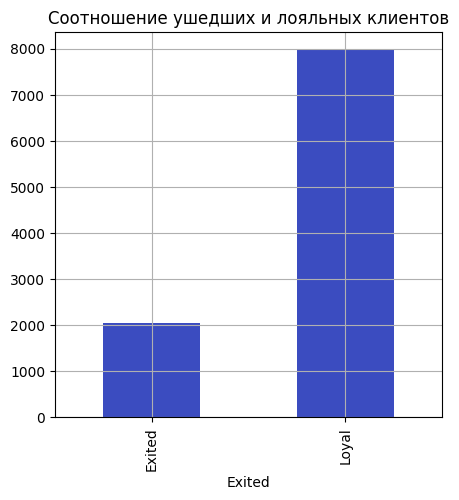

In [4]:
churn_data['Exited'] = churn_data['Exited'].replace([0,1],['Loyal','Exited'])
churn_data.groupby(['Exited'])['Exited'].count().plot(
    kind='bar',
    grid=True,
    figsize=(5, 5),
    colormap='coolwarm',
    title='Соотношение ушедших и лояльных клиентов'
);

### Вариант 2 с круговой диаграммой:

In [5]:
num = churn_data['Exited'].value_counts() 
fig = px.pie(data_frame= num, values= num, names= ['Лояльные клиенты','Ушедшие клиенты'])
fig.show()

**Вывод**: Из 10000 клиентов банка лояльных клиентов около 8000, а ушедших - в 4 раза меньше (около 2000).         
У банка 80% лояльных клиентов.

### <center> **Задание 9.2**

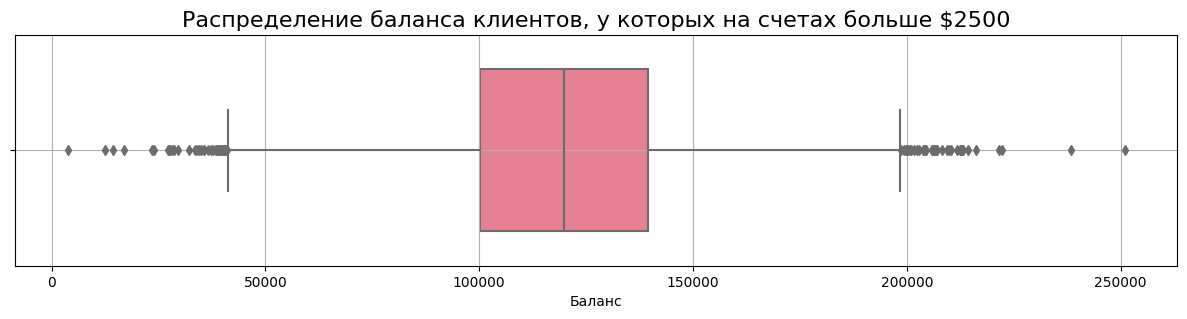

In [6]:
fig = plt.figure(figsize=(15, 3))
boxplot = sns.boxplot(
    data=churn_data[churn_data['Balance'] > 2500],
    x='Balance',
    orient='h',
    width=0.7,
    palette='husl'
);
boxplot.set_title('Распределение баланса клиентов, у которых на счетах больше $2500', fontsize=16);
boxplot.set_xlabel('Баланс');
boxplot.grid()


**Вывод**: Межквартильный размах лежит в пределах от $100000 до $138000, это значит, что у 50% (половины) клиентов банка на счету находится сумма в этом диапазоне.     
Медианное значение баланса ~$119000. Это значит, что у половины клиентов (из тех, у кого на счету которых больше $2500) на счету больше $119000, а у второй половины меньше $119000.        
Q25 соответствует значению $100000, это значит, что примерно у четверти клиентов банка сумма на счете меньше $100000.       
Q75 соответствует значению $138000, это значит, что примерно у 3/4 клиентов банка сумма на счете не превышает $138000.      
Границы распределения ("усы") соответствуют значениям $38000 и $190000 - это условные минимум и максимум денег на счетах клиентов.

### <center> **Задание 9.3**

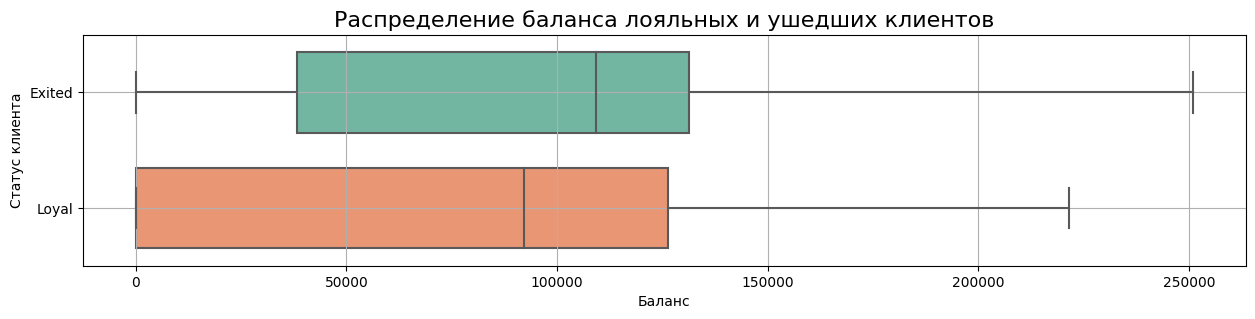

In [7]:
fig = plt.figure(figsize=(15, 3))
boxplot = sns.boxplot(
    data=churn_data,
    x='Balance',
    y='Exited',
    orient='h',
    width=0.7,
    palette='Set2'
);
boxplot.set_title('Распределение баланса лояльных и ушедших клиентов', fontsize=16);
boxplot.set_xlabel('Баланс');
boxplot.set_ylabel('Статус клиента');
boxplot.grid()

**Вывод**: у лояльных клиентов банка больший разброс денег на счету (у половины клиентов от $0 и до $125000).       
А вот у 50% ушедших клиентов суммы на счетах в диапазоне от $45000 до $130000. Это может говорить о том, что ушедших клиентов не устраивает процент по вкладу, например, и им невыгодно хранить большие суммы на счету в этом банке.        

### <center> **Задание 9.4**

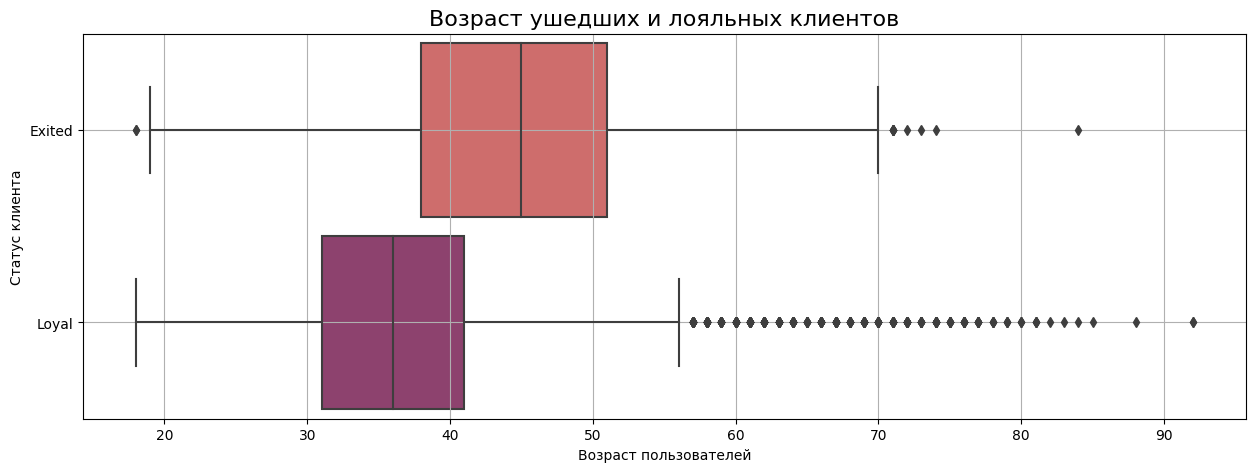

In [8]:
fig = plt.figure(figsize=(15, 5))
boxplot = sns.boxplot(
    data=churn_data,
    x='Age',
    y='Exited',
    orient='h',
    width=0.9,
    palette='flare'
)
boxplot.set_title('Возраст ушедших и лояльных клиентов', fontsize=16);
boxplot.set_xlabel('Возраст пользователей');
boxplot.set_ylabel('Статус клиента');
boxplot.grid()

**Вывод**: Больше потенциальных выбросов в группе лояльных клиентов. Возраст лояльных клиентов находится в диапазоне от 18 до 56 лет. Половина клиентов принадлежат к возрастной категории 32-42 года.      
Среди ушедших клиентов разброс по возрасту больше - от 19 до 70 лет. Половина клиентов принадлежат к возрастной категории 37-51 год. Банку стоит обратить внимание на эту возрастную группу и возможно предложить программы для людей среднего и предпенсионного возраста.

### <center> **Задание 9.5**

Text(0, 0.5, 'Зарплата')

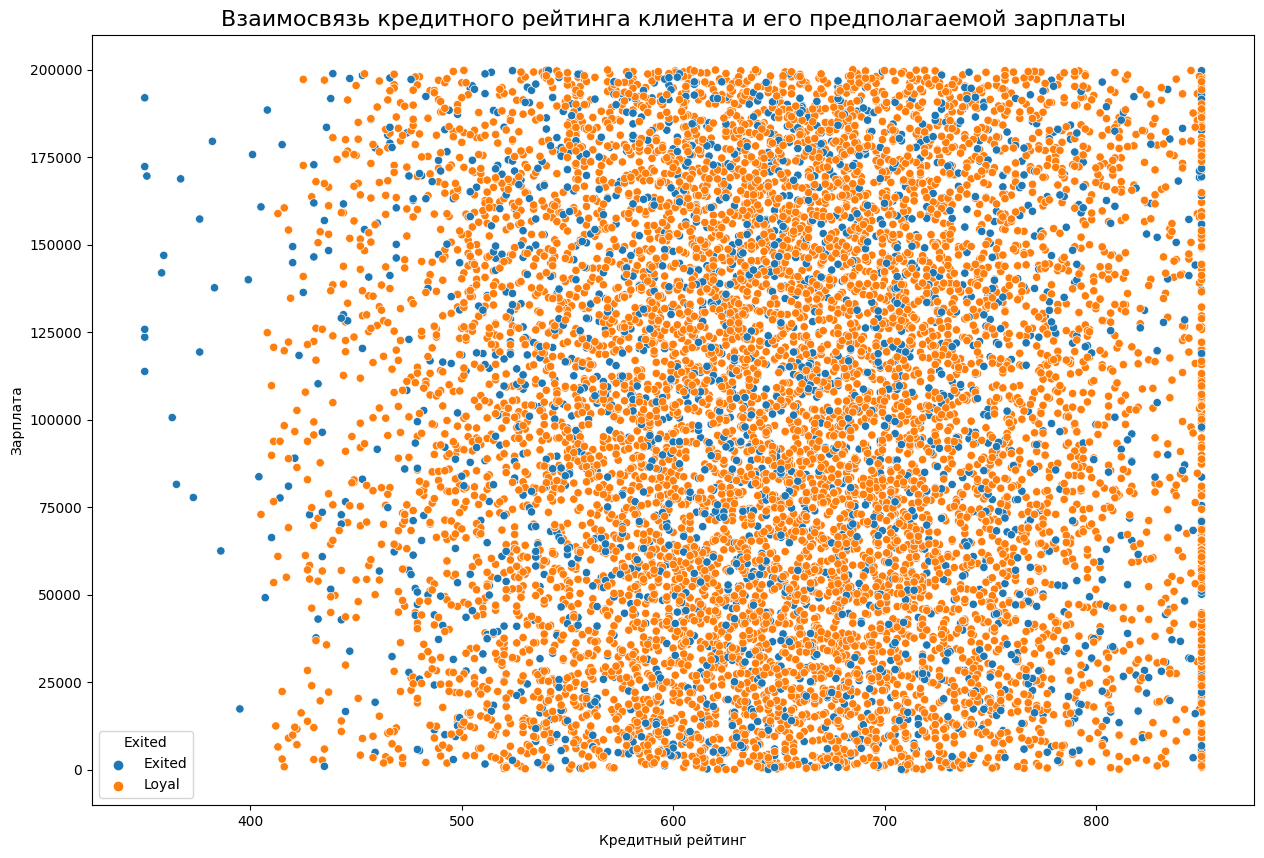

In [9]:
fig = plt.figure(figsize=(15, 10))
scatter = sns.scatterplot(
    data=churn_data,
    x='CreditScore',
    y='EstimatedSalary',
    hue='Exited'
);
scatter.set_title('Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты', fontsize=16);
scatter.set_xlabel('Кредитный рейтинг');
scatter.set_ylabel('Зарплата')

**Вывод**: взаимосвязи между кредитным рейтингом и уровнем зарплаты нет, распределение более-менее равномерное (и среди лояльных, и среди ушедших клиентов).         
Единственное, что прослеживается - клиентами банка (не ушедшими) являются клиенты с кредитным рейтингом более 400 (но, опять же, взаимосвязи между кредитным рейтингом и уровнем зарплаты нет).

### <center> **Задание 9.6**

### Вариант 1

In [10]:
churn_data['Exited'] = churn_data['Exited'].replace(['Loyal','Exited'],[0,1])

In [11]:
mask1 = churn_data.groupby('Gender',as_index=False)['Exited'].mean()
fig = px.pie(
    mask1,
    values='Exited',
    names='Gender',
    color='Gender',   
    height=500,   
    width=600,    
    title='Доля женщин и мужчин среди ушедших клиентов банка',
    color_discrete_map={'Female':'lightpink', 'Male':'royalblue'}
)
fig.show()

**Вывод**: среди ушедших клиентов банка больше женщин (60%), чем мужчин (40%).

### Вариант 2

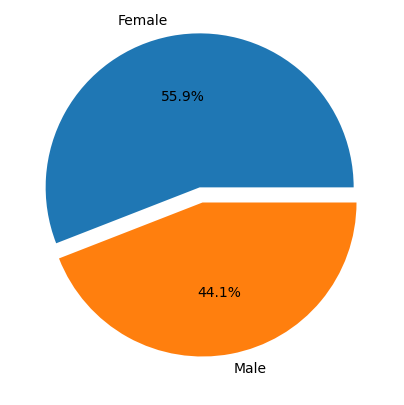

In [15]:
gone = churn_data[churn_data['Exited'] == 1]
fig, axes = plt.subplots(figsize=(5, 5))
axes.pie( gone['Gender'].value_counts(), # берем данные об ушедших клиентах 
         labels=['Female', 'Male'], 
         autopct='%.1f%%', #округление до первого знака после запятой 
         explode=[0.1, 0] #доля смещения от центра
         );

### <center> **Задание 9.7**

In [ ]:
churn_data['Exited'] = churn_data['Exited'].replace([0,1],['Loyal','Exited'])

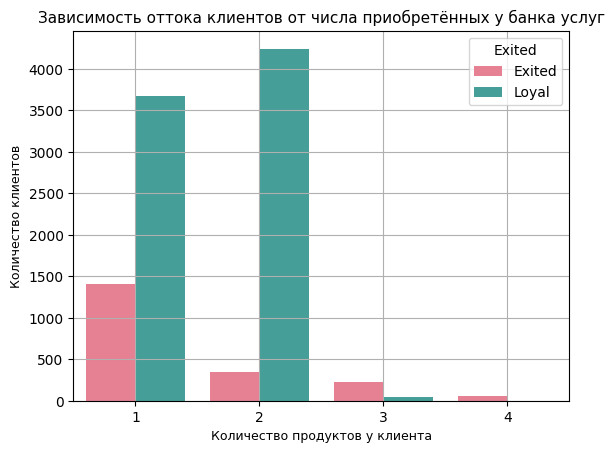

In [ ]:
countplot = sns.countplot(
    data=churn_data,
    x='NumOfProducts',
    hue='Exited',
    palette='husl',
)
countplot.set_title('Зависимость оттока клиентов от числа приобретённых у банка услуг', fontsize=11);
countplot.set_xlabel('Количество продуктов у клиента', fontsize=9);
countplot.set_ylabel('Количество клиентов', fontsize=9);
countplot.grid()

**Вывод**: большинство клиентов банка покидают его, приобретая только одну услугу.      
Также можно отметить, что все ушедшие клиенты банка попробовали разное количество услуг (от 1 до 4), в то время как лояльные клиенты в основном пользуются 1-2 услугами и совсем маленькое количество клиентов используют 3, но никто не пользуется 4.

### <center> **Задание 9.8**

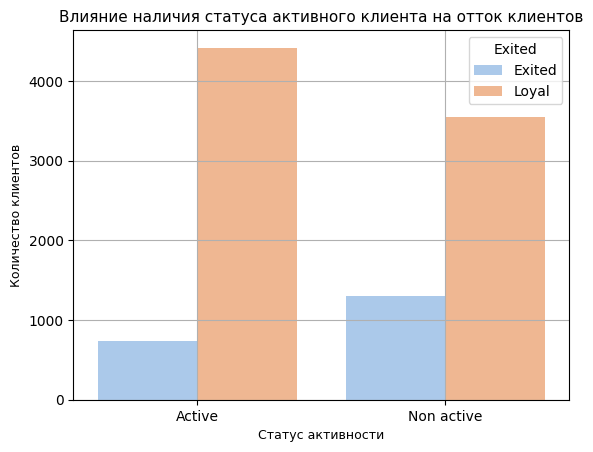

In [ ]:
churn_data['IsActiveMember'] = churn_data['IsActiveMember'].replace([0,1],['Non active','Active'])
countplot1 = sns.countplot(
    data=churn_data,
    x='IsActiveMember',
    hue='Exited',
    palette='pastel',
)
countplot1.set_title('Влияние наличия статуса активного клиента на отток клиентов', fontsize=11);
countplot1.set_xlabel('Статус активности', fontsize=9);
countplot1.set_ylabel('Количество клиентов', fontsize=9);
countplot1.grid()

**Вывод**: среди лояльных клиентов активных 4500, неактивных 3500 (что очень много).        
Поскольку статус активности присуждается клиенту, который активно использует карту и продукты банка, вероятно, неактивные лояльные клиенты просто хранят свои деньги в банке. В этом случае банку стоит подумать о более выгодных процентах по кредитной карте, различных кешбеках за операции по карте, подарках за активность и так далее. 

### <center> **Задание 9.9**

In [ ]:
churn_data['Exited'] = churn_data['Exited'].replace(['Loyal','Exited'],[0,1])

In [ ]:
choropleth_data = churn_data.groupby('Geography', as_index=False)['Exited'].mean()

fig = px.choropleth(
    data_frame=choropleth_data,
    locations='Geography',
    locationmode = 'country names',
    color='Exited',
    range_color=[0, 0.4],
    title='Доля ушедших клиентов банка по странам присутствия',
    width=750,
    height=500,
    color_continuous_scale='brbg'
)
fig.show()

**Вывод**: доля ушедших клиентов в Германии больше в два раза, чем в остальных странах локализации банка (Франции и Испании).       
Это может быть связано с тем, что Германия лидирует по количеству банков в Европе и является "столицей банков", в связи с этим у населения гораздо больший выбор организаций и финансовых услуг.

### <center> **Задание 9.10**

In [ ]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

In [ ]:
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

In [ ]:
pivot = churn_data.pivot_table(
    values='Exited',
    columns='Tenure',
    index='CreditScoreCat'
)

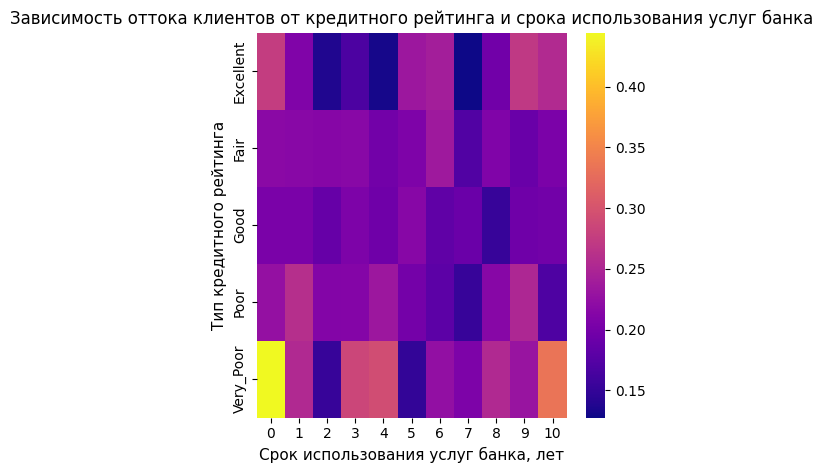

In [ ]:
fig = plt.figure(figsize=(5, 5))

heatmap = sns.heatmap(data=pivot, cmap='plasma');
heatmap.set_title('Зависимость оттока клиентов от кредитного рейтинга и срока использования услуг банка',fontsize=12);
heatmap.set_xlabel('Срок использования услуг банка, лет',fontsize=11);
heatmap.set_ylabel('Тип кредитного рейтинга',fontsize=11);

**Вывод**: чаще всего уходят новые клиенты (срок обслуживания в банке меньше года) с самыми низким кредитным рейтингом.     
Также часто уходят клиенты с самым низким кредитным рейтингом вне зависимости от срока обслуживания в банке (что логично, потому что они вряд ли могут воспользоваться кредитными продуктами банка).